**4.9. Intro to Data Visualization with Python**

Content:
- #01 Task 1 Import libraries and dataset
- #02 Task 2 Follow the instructions to create example visualizations
- #03 Task 3 Create a histogram of the 'order_hour_of_day' column
- #04 Task 4 Create a bar chart from the 'loyalty_flag' column
- #05 Task 5 Check whether there is a difference in expenditure depending on the hour of the day
- #06 Task 6 Create a line chart exploring the connections between age and number of dependents
- #07 Task 7 Create a scatterplot of the connection between age and spending power
- #08 Task 8 Export the visualizations as png files

***

#01**Task 1** - Import libraries and dataset

***

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#set path
path=r'C:\Users\EliteMini HX90\OneDrive\Documents\CareerFoundry\Instacart Project Analysis'

In [3]:
#import dataset
ords_prods_merge = pd.read_pickle(os.path.join(path,'02_Data','02_Prepared_Data','20231107_orders_products_merged_new.pkl'))

***

#02**Task 2** - Follow the instructions to create a bar chart, a histogram, a scatterplot and a line chart

***

<Axes: xlabel='orders_day_of_week'>

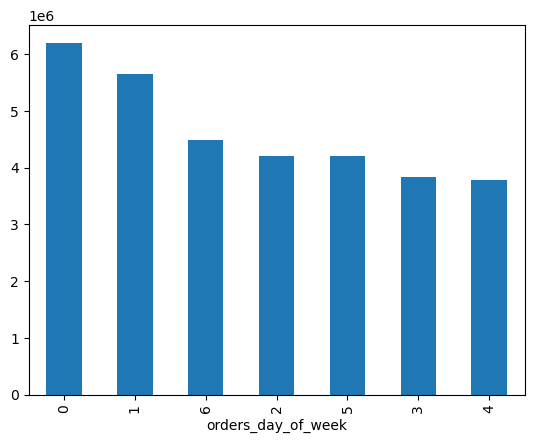

In [4]:
#create a bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

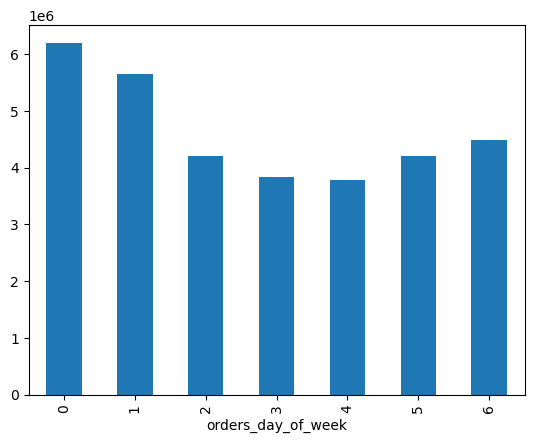

In [5]:
#reordering by index
bar=ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

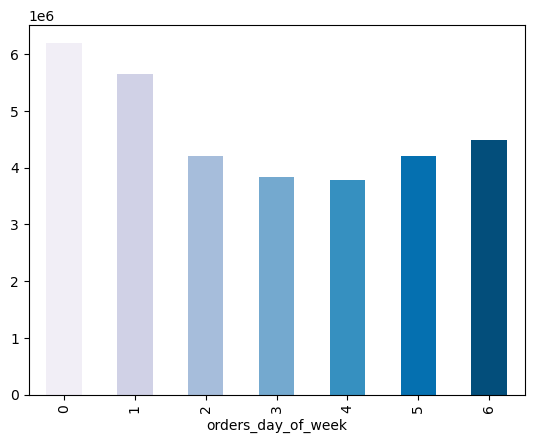

In [6]:
#assigning colours to bars
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['#f1eef6', '#d0d1e6', '#a6bddb', '#74a9cf', '#3690c0', '#0570b0', '#034e7b'])

In [7]:
#export chart
bar.figure.savefig(os.path.join(path, '04_Analysis','03_Visualizations', 'bar_orders_dow.png'))

C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='prices', ylabel='prices'>

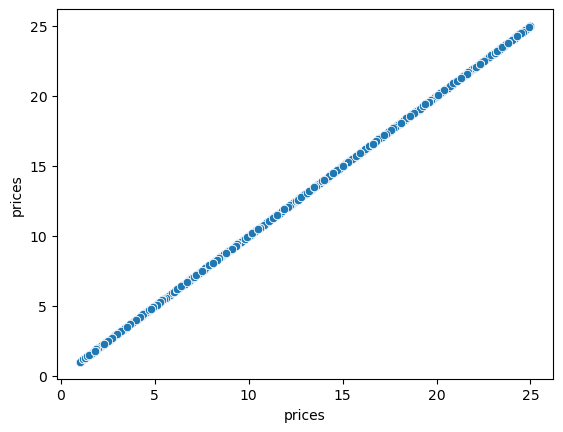

In [8]:
#create scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

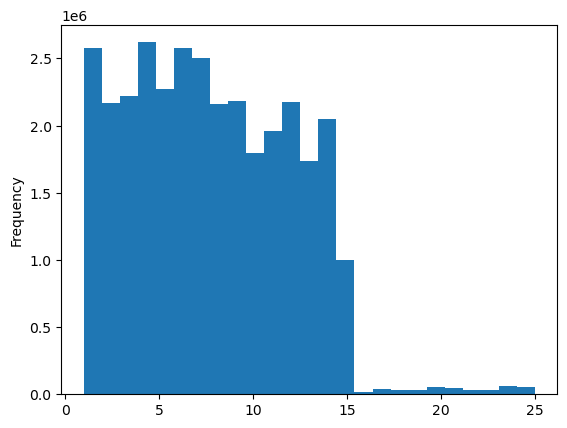

In [9]:
#create histogram
hist=ords_prods_merge['prices'].plot.hist(bins=25)

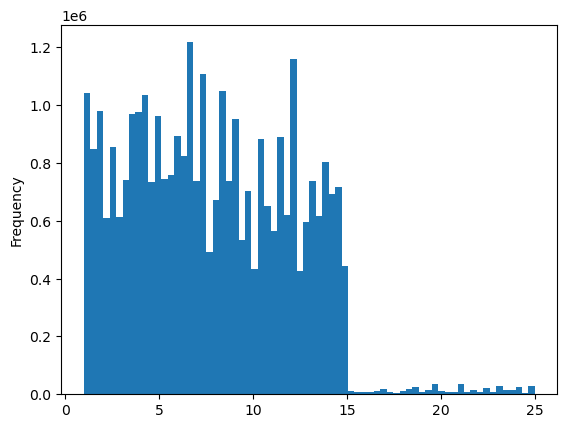

In [10]:
#create histogram
hist=ords_prods_merge['prices'].plot.hist(bins=70)

Note: The unrealistic values on the prices column were sorted on a separate notebook following the instructions of the exercise and the dataset exported in Part 1 of the task (and merged with the new customers dataset) and imported into this notebook already did not contain these.

In [11]:
#export histogram
hist.figure.savefig(os.path.join(path, '04_Analysis','03_Visualizations', 'hist_prices.png'))

In [12]:
#create new boolean value list as a step to create a data sample
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [13]:
#store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [14]:
#store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [15]:
#check length
len(ords_prods_merge)

32404859

In [16]:
#check length
len(big) + len(small)

32404859

In [17]:
#creating subset using only the relevant columns of the sample
df_2=small[['orders_day_of_week','prices']]

In [18]:
df_2.head()

,orders_day_of_week,prices
0,6,5.8
2,5,20.0
3,5,20.0
6,5,4.4
10,0,12.8


C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

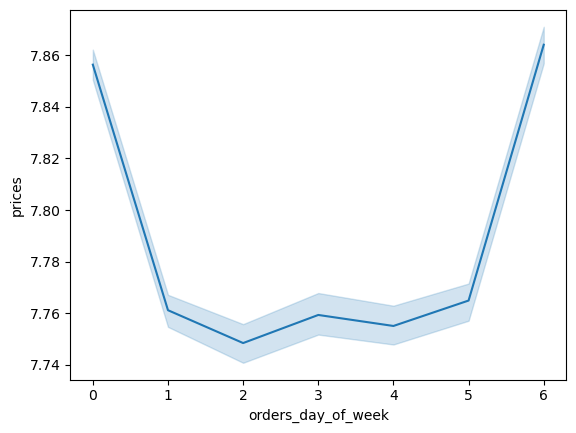

In [19]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [20]:
#export line chart
line.figure.savefig(os.path.join(path, '04_Analysis','03_Visualizations', 'line_dow_prices.png'))

***

#03**Task 3** - Create a histogram of the order_hour_of_day column

***

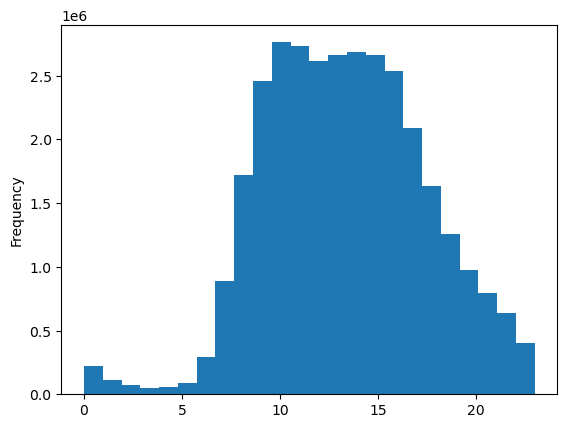

In [21]:
#create histogram
hist_hour =ords_prods_merge['order_hour_of_day'].plot.hist(bins=24)

In the histogram we can see that the number of orders during a day tends to peak at 10h00, with most orders being placed between 10h00 and 16h00. After 16h00, we see a drop in the number of orders per hour, reaching the lowest point around 3h00.

***

#04**Task 4** - Create a bar chart from the loyalty_flag column.

***

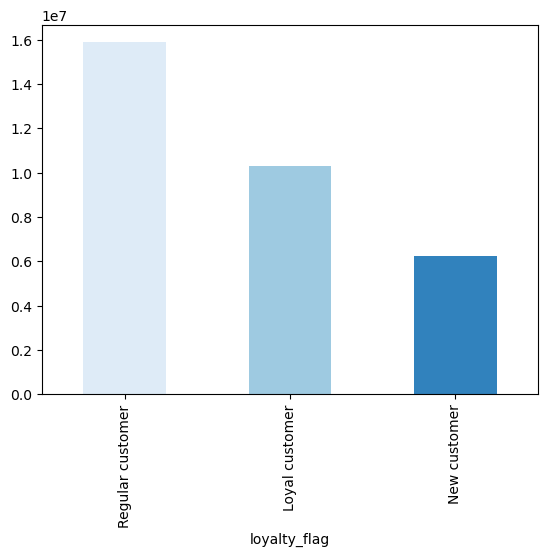

In [22]:
#create a bar chart 
bar_loyalty = ords_prods_merge['loyalty_flag'].value_counts().plot.bar(color=['#deebf7','#9ecae1','#3182bd'])

***

#05**Task 5** - Check whether there is a difference in expenditure depending on the hour of day.

***

In [23]:
small.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
6,4913,Table Water Crackers,78,19,4.4,894221,138,23,5,13,...,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
10,7987,Hazelnut Spread with Cocoa,88,13,12.8,1592314,138,5,0,9,...,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


In [24]:
#creating subset using only the relevant columns of the sample
df_5=small[['order_hour_of_day','prices']]

C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\EliteMini HX90\AppData\Local\Temp\ipykernel_8244\62328770.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  line_prices_hour = sns.lineplot(data = df_5, x = 'order_hour_of_day',y = 'prices', palette='PuBu_r')
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating inste

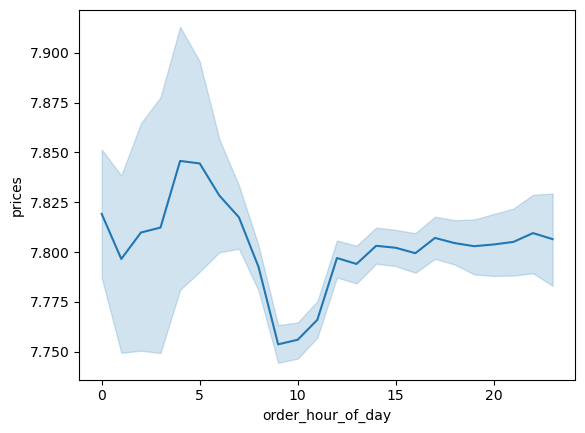

In [25]:
#plot line chart using df_5 sample
line_prices_hour = sns.lineplot(data = df_5, x = 'order_hour_of_day',y = 'prices', palette='PuBu_r')

In [26]:
df_5.describe()

,order_hour_of_day,prices
count,9.721098e+06,9.719552e+06
mean,1.342467e+01,7.791543e+00
std,4.244412e+00,4.242356e+00
min,0.000000e+00,1.000000e+00
25%,1.000000e+01,4.200000e+00
50%,1.300000e+01,7.400000e+00
75%,1.600000e+01,1.130000e+01
max,2.300000e+01,2.500000e+01


In [27]:
ords_prods_merge[['order_hour_of_day','prices']].describe()

,order_hour_of_day,prices
count,3.240486e+07,3.239973e+07
mean,1.342515e+01,7.790994e+00
std,4.246380e+00,4.241809e+00
min,0.000000e+00,1.000000e+00
25%,1.000000e+01,4.200000e+00
50%,1.300000e+01,7.400000e+00
75%,1.600000e+01,1.130000e+01
max,2.300000e+01,2.500000e+01


It looks like more expensive items are bought towards the beginning of the day. However, the values plotted are very close to the mean value of 'prices' and do not seem to experience a major fluctuation, so further analysis should be done on whether this fluctuation is significant enough to be worth considering.

***

#06**Task 6** - Create a line chart exploring the connections between age and number of dependents.

***

In [28]:
#creating subset using only the relevant columns of the sample
df_6=small[['age','n_dependants']]

In [29]:
df_6.describe()

,age,n_dependants
count,9.721098e+06,9.721098e+06
mean,4.946312e+01,1.501945e+00
std,1.848655e+01,1.118746e+00
min,1.800000e+01,0.000000e+00
25%,3.300000e+01,1.000000e+00
50%,4.900000e+01,2.000000e+00
75%,6.500000e+01,3.000000e+00
max,8.100000e+01,3.000000e+00


In [30]:
ords_prods_merge[['age','n_dependants']].describe()

,age,n_dependants
count,3.240486e+07,3.240486e+07
mean,4.946527e+01,1.501896e+00
std,1.848558e+01,1.118865e+00
min,1.800000e+01,0.000000e+00
25%,3.300000e+01,1.000000e+00
50%,4.900000e+01,2.000000e+00
75%,6.500000e+01,3.000000e+00
max,8.100000e+01,3.000000e+00


C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\EliteMini HX90\AppData\Local\Temp\ipykernel_8244\955136090.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  line_age_dependants = sns.lineplot(data = df_6, x = 'age',y = 'n_dependants', palette='PuBu_r')
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


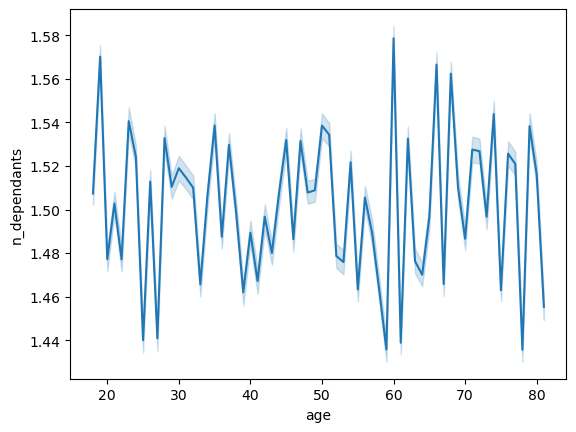

In [31]:
#plot line chart using df_6 sample
line_age_dependants = sns.lineplot(data = df_6, x = 'age',y = 'n_dependants', palette='PuBu_r')

There does not appear to be a connection between age and number of dependents of InstaCart customers.

***

#07**Task 7** - Create a scatterplot exploring the connection between age and spending power (income).

***

In [32]:
#creating subset using only the relevant columns of the dataset
df_7=ords_prods_merge[['age','income']]

C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


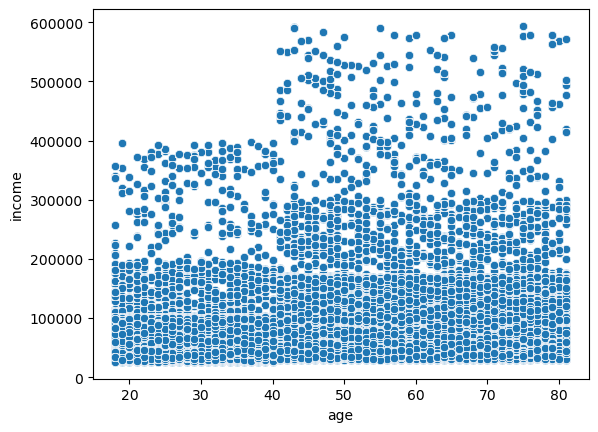

In [33]:
#create scatterplot
scatter_age_income = sns.scatterplot(x = 'age', y = 'income',data = df_7)

The majority of customers seems to have an income under 200.000. This is particularly true for those under 40 years old, with seemingly no customer under 40 having an income higher than 400.000. On the other hand, while the majority of customers over 40 still seem to have an income under 400.000 and possibly even under 200.000, we can see some indication of incomes up to 600.000 in this age bracket.

***

#08**Task 8** - Export the visualisations

***


In [34]:
#export histogram hour of day
hist_hour.figure.savefig(os.path.join(path, '04_Analysis','03_Visualizations', 'hist_hour.png'))

In [35]:
#export bar chart loyalty flag
bar_loyalty.figure.savefig(os.path.join(path, '04_Analysis','03_Visualizations', 'bar_loyalty.png'),bbox_inches='tight')

In [36]:
#export line chart comparing prices and hour of order
line_prices_hour.figure.savefig(os.path.join(path, '04_Analysis','03_Visualizations', 'line_prices_hour.png'))

In [37]:
#export line chart comparing age and number of dependants
line_age_dependants.figure.savefig(os.path.join(path, '04_Analysis','03_Visualizations', 'line_age_dependants.png'))

In [38]:
#export scatterplot comparing age and income
scatter_age_income.figure.savefig(os.path.join(path, '04_Analysis','03_Visualizations', 'scatter_age_income.png'))